<center>
    <font>Анализ данных с использованием Python</font><br/>
    <br/>
    <br/>
    <b style="font-size: 2em">Функции и файлы Python</b><br/>
    <br/>
    <font>Иван Кириллов</font><br/>
</center>

# Функции

## Что такое функция?

Именованный кусок кода, который можно переиспользовать

## Зачем нужны функции?

- Упрощение поддержки за счет переиспользования кода
- Логическая структуризация программы, т.к. проще работать с небольшими кусочками кода, которые призваны сделать что-то простое и понятное
- Самодокументирование кода при использовании говорящих названий функций и параметров

## Объявление функции

В общем случае:
```
def <название функции>(<аргументы>):
    """ документация """
    ...
    <непосредственно код функции>
    ...
    return <объект>
```


In [ ]:
# Минимальный случай

def algorithm():
    pass

<div class="alert alert-info">
<b>Hint:</b> Ключевое слово "pass" бывает полезно, если нужно явно указать, что в блоке кода ничего делать не нужно
</div>

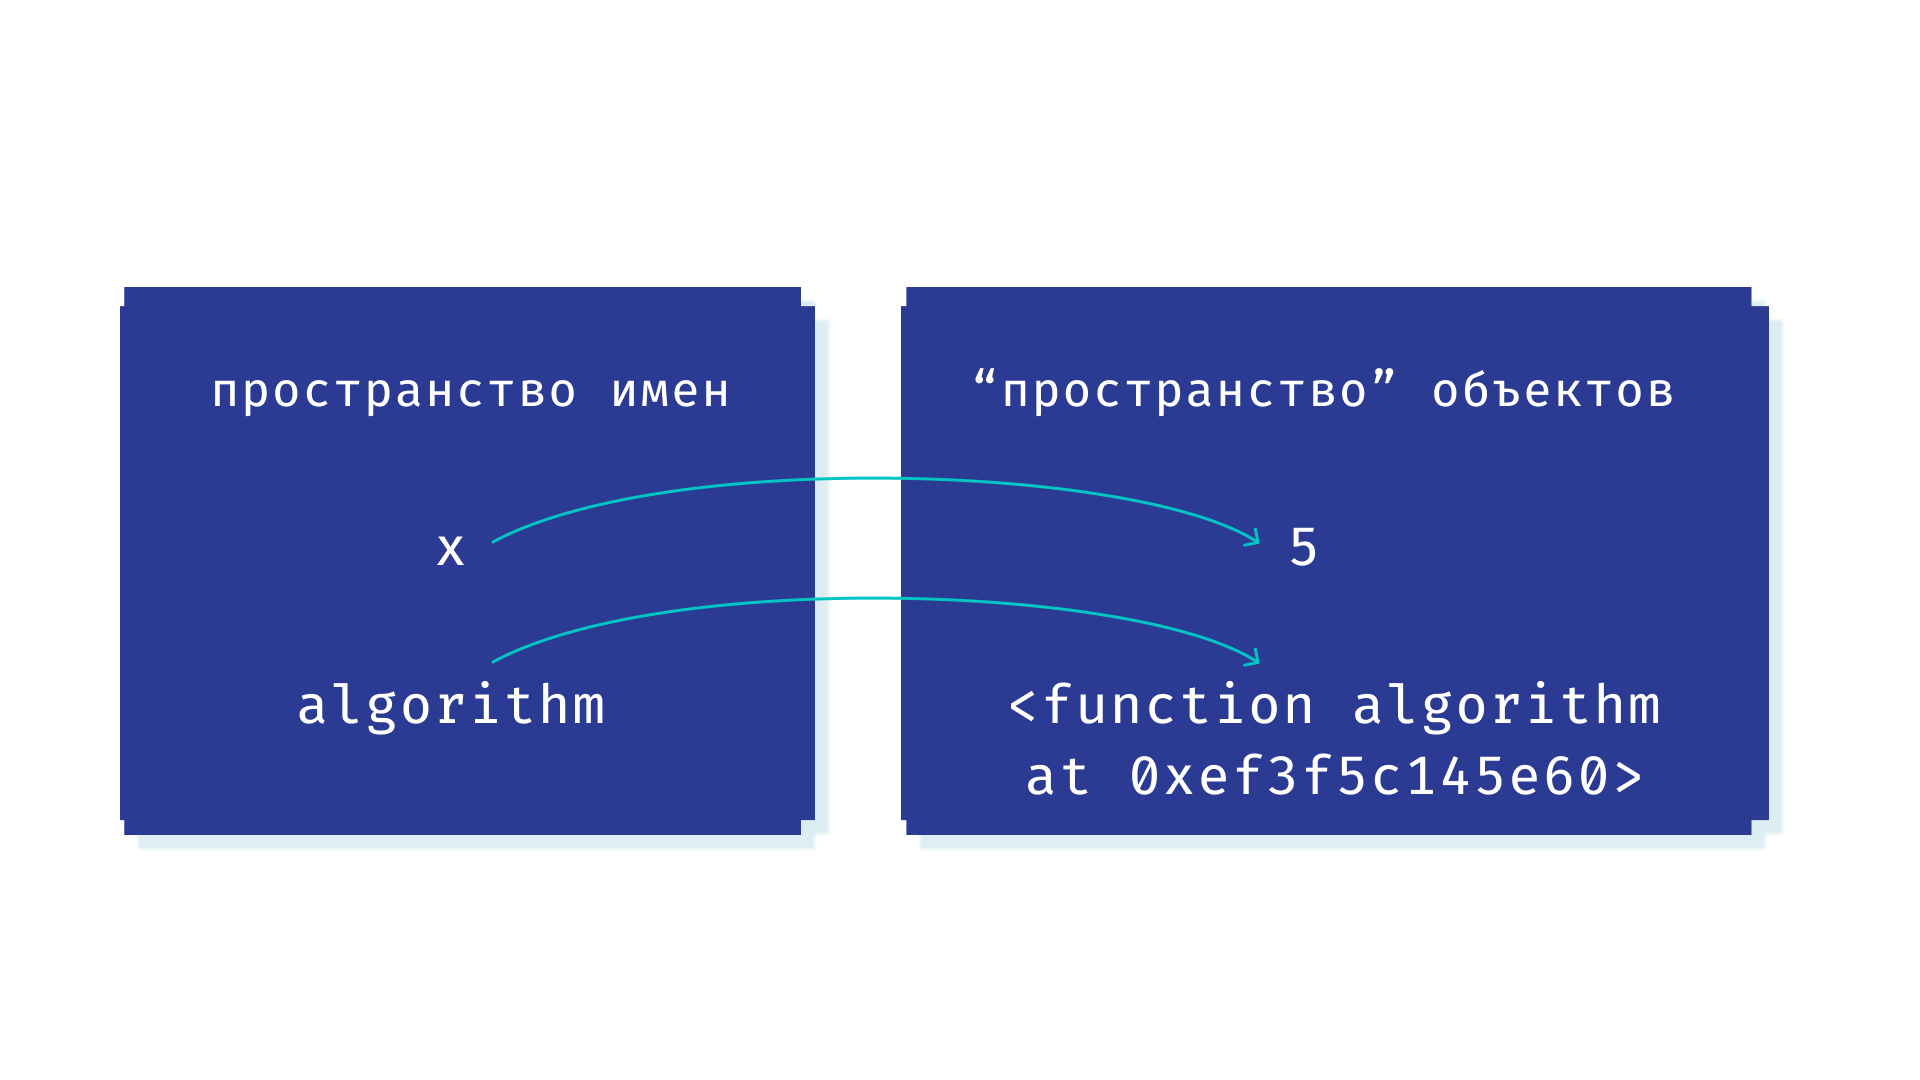

In [ ]:
# Т.е. действительно очень похоже на работу с простыми переменными

function = algorithm
function()

## Вызов функции и её значение

In [ ]:
result = function()

In [ ]:
print(result)

<div class="alert alert-info">
<b>Info:</b> В питоне функция всегда возвращает значение. Если в теле функции отсутствует <code>return</code>, она возвращает <code>None</code>
</div>

In [ ]:
def meaning_of_life():
    return 42

## Область видимости

In [ ]:
# Аргумент функции является локальной переменной
# Он существует только во время выполнения функции и доступен только внутри неё
# Также говорят, что аргумент функции находится в локальной области видимости функции

def only_even(numbers):
    for i, x in enumerate(numbers):
        if x % 2 != 0:
            return False
    return True


print(numbers)

In [ ]:
# Кроме локальной существует глобальная область видимости
# Переменные, созданные в основном коде программы, находятся в глобальной области видимости
# Это означает, что к ним можно получить доступ в любой части программы

def check_password(pwd):
    return pwd == password


password = "Python"
print(check_password("123"))

In [ ]:
# Обратиться можно к любой глобальной переменной
# И мутабельные объекты можно через них поменять

def list_modify():
    del sample[-1]


sample = [1, 2, 3]
list_modify()
print(sample)

In [ ]:
# А вот при присвоении глобальной переменной нового значения
# На самом деле создается просто локальная переменная с тем же именем

def list_modify():
    sample = [4, 5, 6]


sample = [1, 2, 3]
list_modify()
print(sample)

In [ ]:
# С аргументами ровно так же -- ведь они являются локальными переменными

def list_modify_1(list_arg):
    # создаём новый локальный список, не имеющий связи с внешним
    list_arg = [1, 2, 3, 4]


def list_modify_2(list_arg):
    # меняем исходный внешний список, переданный как аргумент
    list_arg += [4]


sample_1 = [1, 2, 3]
sample_2 = [1, 2, 3]
list_modify_1(sample_1)
list_modify_2(sample_2)
print(sample_1)
print(sample_2)

In [ ]:
# С помощью ключевого слова global можно заставить меняться именно глобальную переменную
# Вместо создания локальной

def inc():
    global x
    x += 1
    print(f"Количество вызовов функции равно {x}.")


x = 0
inc()
inc()
inc()
print(f"Final {x = }")

<div class="alert alert-danger">
<b>Антипаттерн:</b> Использовать <code>global</code> где попало, а не только там, где без него действительно невозможно обойтись.
</div>

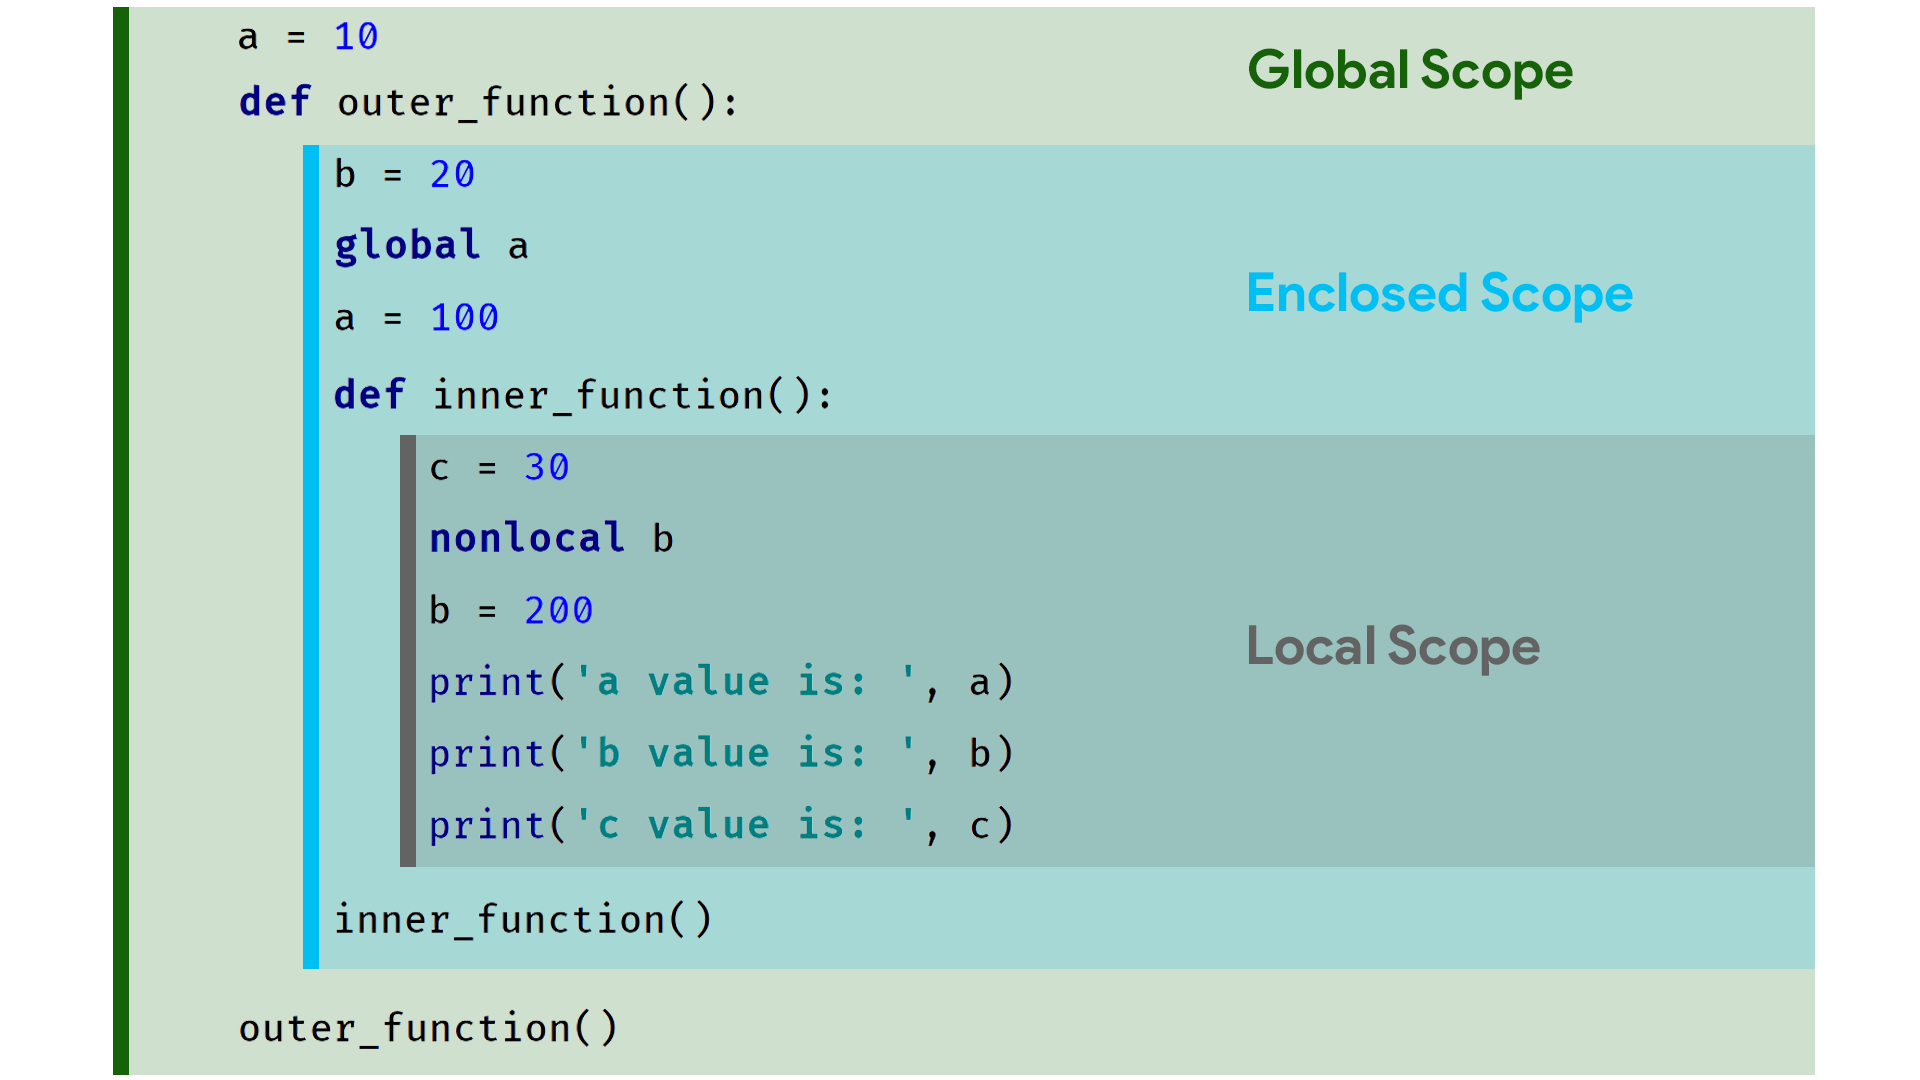

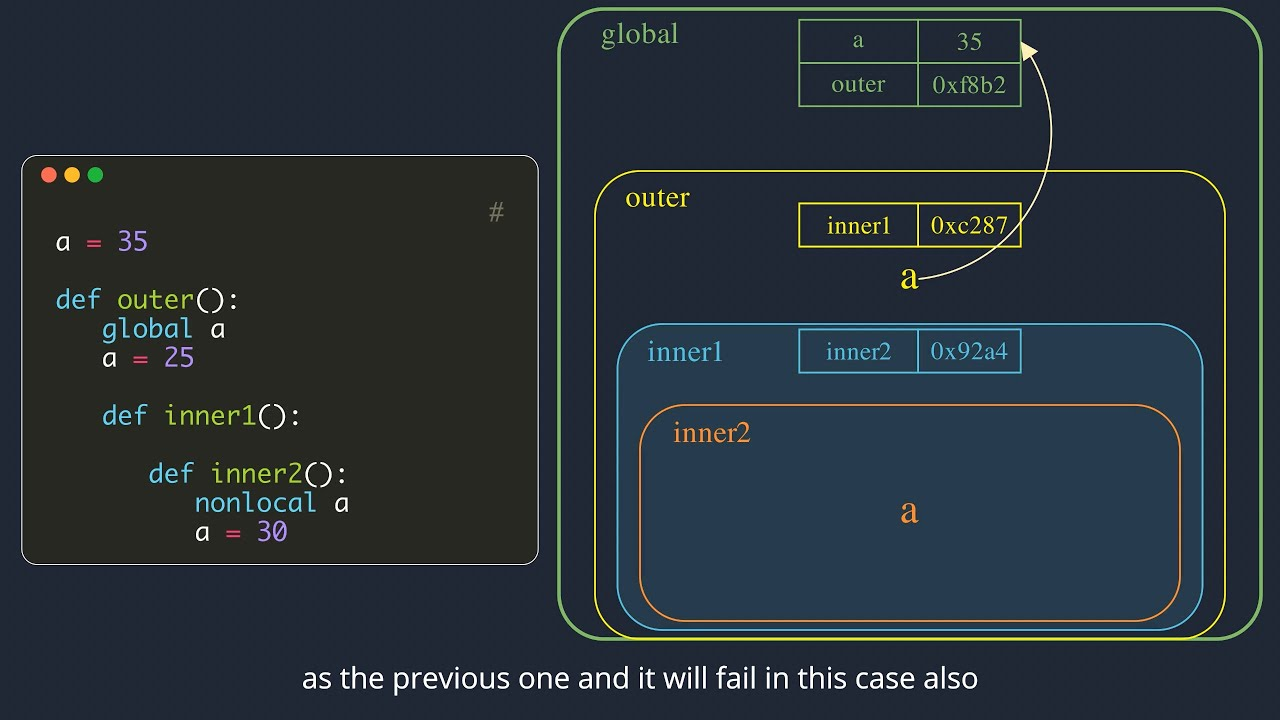

## Пример осмысленной функции

<center>
<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/6b915be29a0f9a5267018f90014a74c6a04551f1  width=800/>
</center>

## Аргументы функции

In [ ]:
# Перевели формулу в код, в качестве f(x, y) взяли просто их среднее пока

def relative_difference(x, y):
    delta = x - y
    mean = (x + y) / 2
    return abs(delta / mean)

In [ ]:
# Можно передавать аргументы просто по их позиции

relative_difference(3, 5)

In [ ]:
# А можно и по названию, тогда порядок подачи можно менять

relative_difference(y=5, x=3)

<div class="alert alert-info">
<b>Hint:</b> Аргументы в функцию можно передавать по имени, при этом порядок аргументов не важен
</div>

<div class="alert alert-warning">
<b>PEP 8:</b> При указании аргументов по имени пробелы вокруг знака равенства не ставятся!
</div>

In [ ]:
# И гибридный способ тоже возможен

relative_difference(3, y=5)

In [ ]:
# Правда тогда все аргументы после того, который вы передали по имени
# Тоже надо передавать по имени

relative_difference(x=3, 5)

In [ ]:
relative_difference(5, -5)

In [ ]:
def safe_relative_difference_long(x, y):
    delta = x - y
    mean = (x + y) / 2
    if mean == 0.0:
        res = None
    else:
        res = abs(delta / mean)
    return res

<div class="alert alert-info">
<b>Hint:</b> Как и во многих языках, в питоне функция может содержать более одного <code>return</code>
</div>

In [ ]:
def safe_relative_difference(x, y):
    delta = x - y
    mean = (x + y) / 2
    if mean == 0.0:
        return None  # If condition is met function execution ends here
    return abs(delta / mean)

In [ ]:
print(safe_relative_difference(5, -5))

## Документирование и аннотирование функций

In [ ]:
def relative_difference(x: float, y: float) -> float | None:
    """
    Compares two quantities taking into account their absolute values
    And another line just to make an example of multiline docstrings
    """
    delta = x - y
    mean = (x + y) / 2
    if mean == 0.0:
        return None
    return abs(delta / mean)

In [ ]:
help(relative_difference)

<div class="alert alert-info">
<b>Hint:</b> <code>help</code> выводит документацию по использованию объекта. Особенно полезна в интеративном режиме.
</div>

In [ ]:
help(pow)

In [ ]:
# Еще раз: здесь мы возвращаем None

def fib(n: int) -> None:
    """
    Print a Fibonacci series up to n.
    
    :param n: upper bound
    """
    a, b = 0, 1
    while a < n:
        print(a, end=' ')
        a, b = b, a + b
    print()


fib(2000)

In [ ]:
# А в этой версии возвращаем список

def fib2(n: int) -> list[int]:
    """
    Return a list containing the Fibonacci series up to n.
    
    :param n: upper bound
    """
    result = []
    a, b = 0, 1
    while a < n:
        result.append(a)
        a, b = b, a + b
    return result


fib2(100)

## Значение аргументов по умолчанию

In [ ]:
def relative_difference(x: float, y: float, verbose: bool = False) -> float | None:
    delta = x - y
    if verbose:
        print(f'Delta: {delta}')
    mean = (x + y) / 2
    if verbose:
        print(f'Mean: {mean}')
    if mean == 0.0:
        if verbose:
            print('Mean is equal to zero!')
        return None
    return abs(delta / mean)

<div class="alert alert-warning">
<b>PEP 8:</b> Для аргументов с типом при указании дефолтного значения принято ставить пробелы вокруг знака равенства
</div>

In [ ]:
# Теперь необязательно указать verbose, ведь по умолчанию у нас там есть значение

relative_difference(-10, 3)

In [ ]:
relative_difference(-10, y=3, verbose=True)

In [ ]:
relative_difference(y=3, x=-10, verbose=True)

In [ ]:
relative_difference(x=-10, y=3, True)

## Опциональные аргументы

In [ ]:
# В целом, просто поставили аргументу по умолчанию None

def relative_difference(x, y, normalize_by=None):
    delta = x - y
    
    if normalize_by is not None:
        norm = normalize_by(x, y)
    else:
        norm = 1

    if norm == 0.0:
        return None
    return abs(delta / norm)

<div class="alert alert-warning">
<b>PEP 8:</b> Cравнивать что-либо с <code>None</code> нужно с помощью <code>is</code>, <code>is not</code>, т.к. это синглтон.
</div>

<div class="alert alert-warning">
<b>PEP 8:</b> Использовать <code>... is not ...</code> всегда предпочтительнее, чем <code>not ... is </code>, ибо "Readability counts." (с) Zen of Python
</div>

In [ ]:
relative_difference(-5, 8, normalize_by=max)

In [ ]:
def mean(x: float, y: float) -> float:
    return (x + y) / 2

In [ ]:
relative_difference(-5, 8, normalize_by=mean)

In [ ]:
relative_difference(-5, 8)

In [ ]:
relative_difference(-5, 8, mean)

## Исключительно именованные аргументы

In [ ]:
# Аргументы после * -- передача значения только по имени

def relative_difference(x, y, *, normalize_by=None):

    delta = x - y

    if normalize_by is not None:
        norm = normalize_by(x, y)
    else:
        norm = 1.0

    if norm == 0.0:
        return None
    return abs(delta / norm)

In [ ]:
relative_difference(-5, 8, mean)

In [ ]:
relative_difference(-5, 8, normalize_by=mean)

## Исключительно позиционные аргументы

In [ ]:
# Аргументы перед / -- передача значения только по позиции

def relative_difference(x, y, /, *, normalize_by=None):

    delta = x - y

    if normalize_by is not None:
        norm = normalize_by(x, y)
    else:
        norm = 1.0

    if norm == 0.0:
        return None
    return abs(delta / norm)

In [ ]:
relative_difference(-5, y=8, normalize_by=mean)

## Подытожим

```
def f(pos1, pos2, /, pos_or_kwd, *, kwd1, kwd2):
      -----------    ----------     ----------
        |             |                  |
        |        Positional or keyword   |
        |                                - Keyword only
         -- Positional only

```

Обратите внимание, что `/` и `*` — опциональны, и вы не всегда их встретите в объявлениях функций. В таком случае все аргументы считаются "positional or keyword":

```
def f(pos_or_kwd_1, pos_or_kwd_2, pos_or_kwd_3):
      ----------------------------------------
                         |                 
               Positional or keyword   
```

Если нет `*`:
```
def f(pos1, pos2, /, pos_or_kwd_1, pos_or_kwd_2):
      -----------    --------------------------
        |                       |                 
        |             Positional or keyword  
        |                                
         -- Positional only
```

Если нет `/`:
```
def f(pos_or_kwd_1, pos_or_kwd_2, *, kwd1, kwd2):
      --------------------------     ----------
                   |                     |
         Positional or keyword           |
                                         - Keyword only
```

## Инициализация дефолтных аргументов

In [ ]:
# Значение по умолчанию сохраняется внутри функции при ее объявлении
# И потом оно никак не перетирается, пока вы явно руками этого не сделаете

i = 5

def f(arg=i):
    print(arg)

i = 6
f()

In [ ]:
# Создали где-то в памяти пустой список
# Взяли его ссылку и кинули по умолчанию в функцию

def function(list_argument=[]):
    list_argument.append("Hi!")  
    return list_argument

In [ ]:
function()

In [ ]:
function()

In [ ]:
function()

<div class="alert alert-danger">
<b>Ошибка:</b> Использовать мутабельные объекты в качестве дефолтного значения аргумента функции
</div>

In [ ]:
# Теперь при каждом вызове функции у вас None по умолчанию
# Следовательно внутри каждый раз срабатывает if и в аргумент записывается пустой список

def function(list_argument=None):
    if list_argument is None:
        list_argument = []
    list_argument.append("Hi!")  
    return list_argument

In [ ]:
function()

In [ ]:
function()

In [ ]:
function()

<div class="alert alert-success">
<b>Рекомендация:</b> По возможности, используйте <code>None</code> в качестве дефолтного значения аргумента функции 
</div>

## Функция от произвольного числа аргументов

<center>
<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/fc621ce0b9b2d52e3ce835a9211f042f272c341e width="300"/>
</center>

In [ ]:
def root_mean_square(args: list[float]) -> float:
    if not args:
        return 0.0

    squares_sum = sum(x ** 2 for x in args)

    mean = squares_sum / len(args)
    return mean ** 0.5

In [ ]:
root_mean_square([4, 8, 15, 16, 23, 42])

## *args

In [ ]:
def root_mean_square(*args: float) -> float:
    print(type(args))  # т.е. args -- tuple в этом случае
    if not args:
        return 0.0
    
    squares_sum = sum(x ** 2 for x in args)

    mean = squares_sum / len(args)
    return mean ** 0.5

<div class="alert alert-warning">
<b>PEP 8:</b> Для <code>*args</code> указывается тип одного элемента списка!
</div>

In [ ]:
root_mean_square(4, 8, 15, 16, 23, 42)

## **kwargs

In [ ]:
def root_mean_square(*args, **kwargs):
    print(f"{kwargs = }, тип: {type(kwargs)}")
    verbose = kwargs.get('verbose', False)
    
    if not len(args):
        if verbose:
            print('Empty arguments list!')
        return 0.0

    squares_sum = sum(x ** 2 for x in args)
    if verbose:
        print(f'Sum of squares: {squares_sum}')

    mean = squares_sum / len(args)
    if verbose:
        print(f'Mean square: {mean}')

    return mean ** 0.5

In [ ]:
root_mean_square(4, 8, 15, 16, 23, 42, verbose=True, unused_arg="lole")

In [ ]:
root_mean_square(verbose=True, unused_arg="lole")

## Распаковка аргументов функции

In [ ]:
def function(x, y, /, *, option1=None, option2=None):
    print(x, y, option1, option2)

In [ ]:
positional = [4, 8]  # можно и tuple (и другой подходящий iterable)
key_value = {'option1': 15, 'option2': 16}

In [ ]:
function(*positional, **key_value)

In [ ]:
function(4, 8, option1=3, **key_value)

## Вызов функций из функций
Из тела функций тоже можно вызывать функции. При этом вызывавшая сторона ожидает "в заморозке" до тех пор, пока вызванная не закончит свою работу. Такой ход исполнения называется **синхронным вызовом** и подразумевает, что исполнитель (в нашем случае это интерпретатор Python) однозадачный — может исполнять одновременно только одно действие.

Посмотрим на работу синхронных вызовов вот этих функций:

In [ ]:
def grandfather():
    print('Дедка зовёт бабку.')
    grandmother()
    print('Дедка за репку!')

def grandmother():
    print('Бабка зовёт внучку.')
    granddaughter()
    print('Бабка за дедку.')

def granddaughter():
    print('Внучка зовёт жучку.')
    dog()
    print('Внучка за бабку!')

def dog():
    print('Жучка зовёт кошку.')
    cat()
    print('Жучка за внучку!')

def cat():
    print('Кошка зовёт мышку.')
    mouse()
    print('Кошка за жучку!')

def mouse():
    print('Мышка никого не зовёт. Мышка просто тянет за кошку.')

In [ ]:
grandfather()
print("Ура! И вытянули репку!")

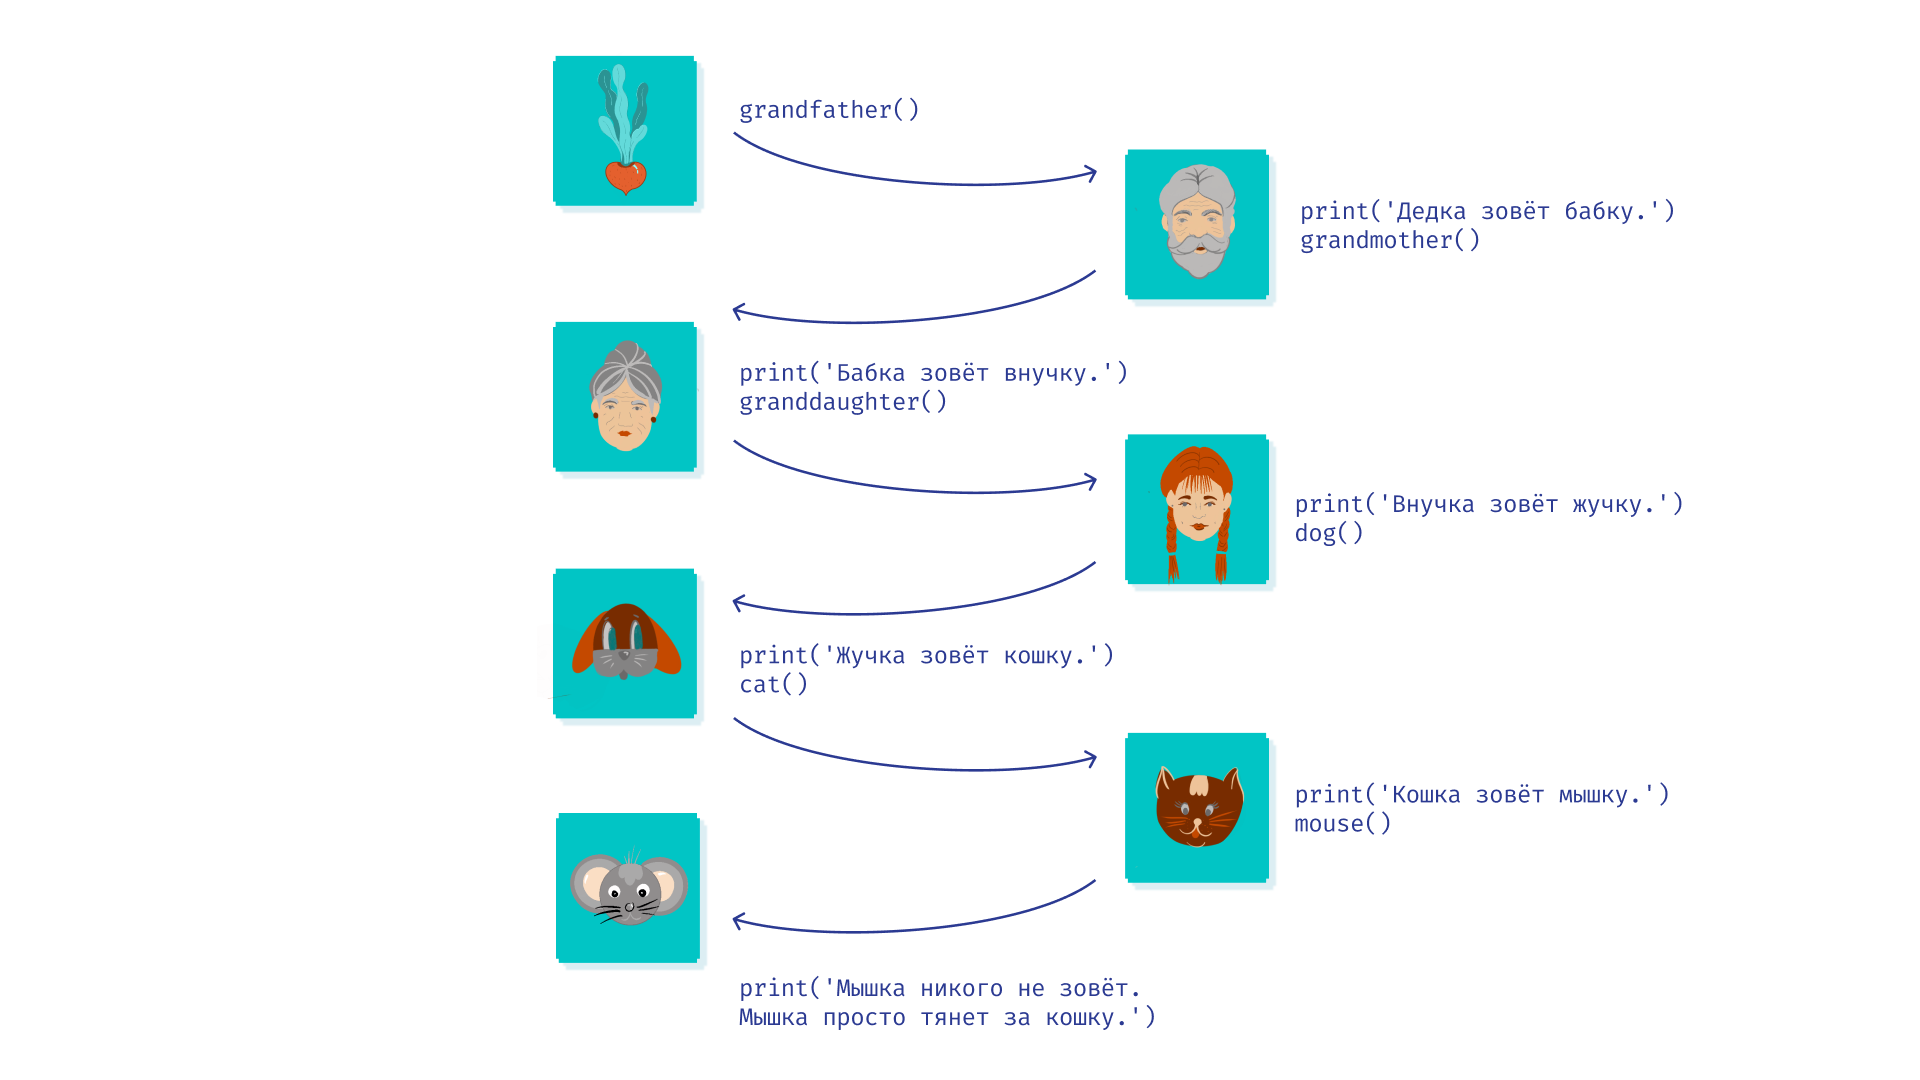

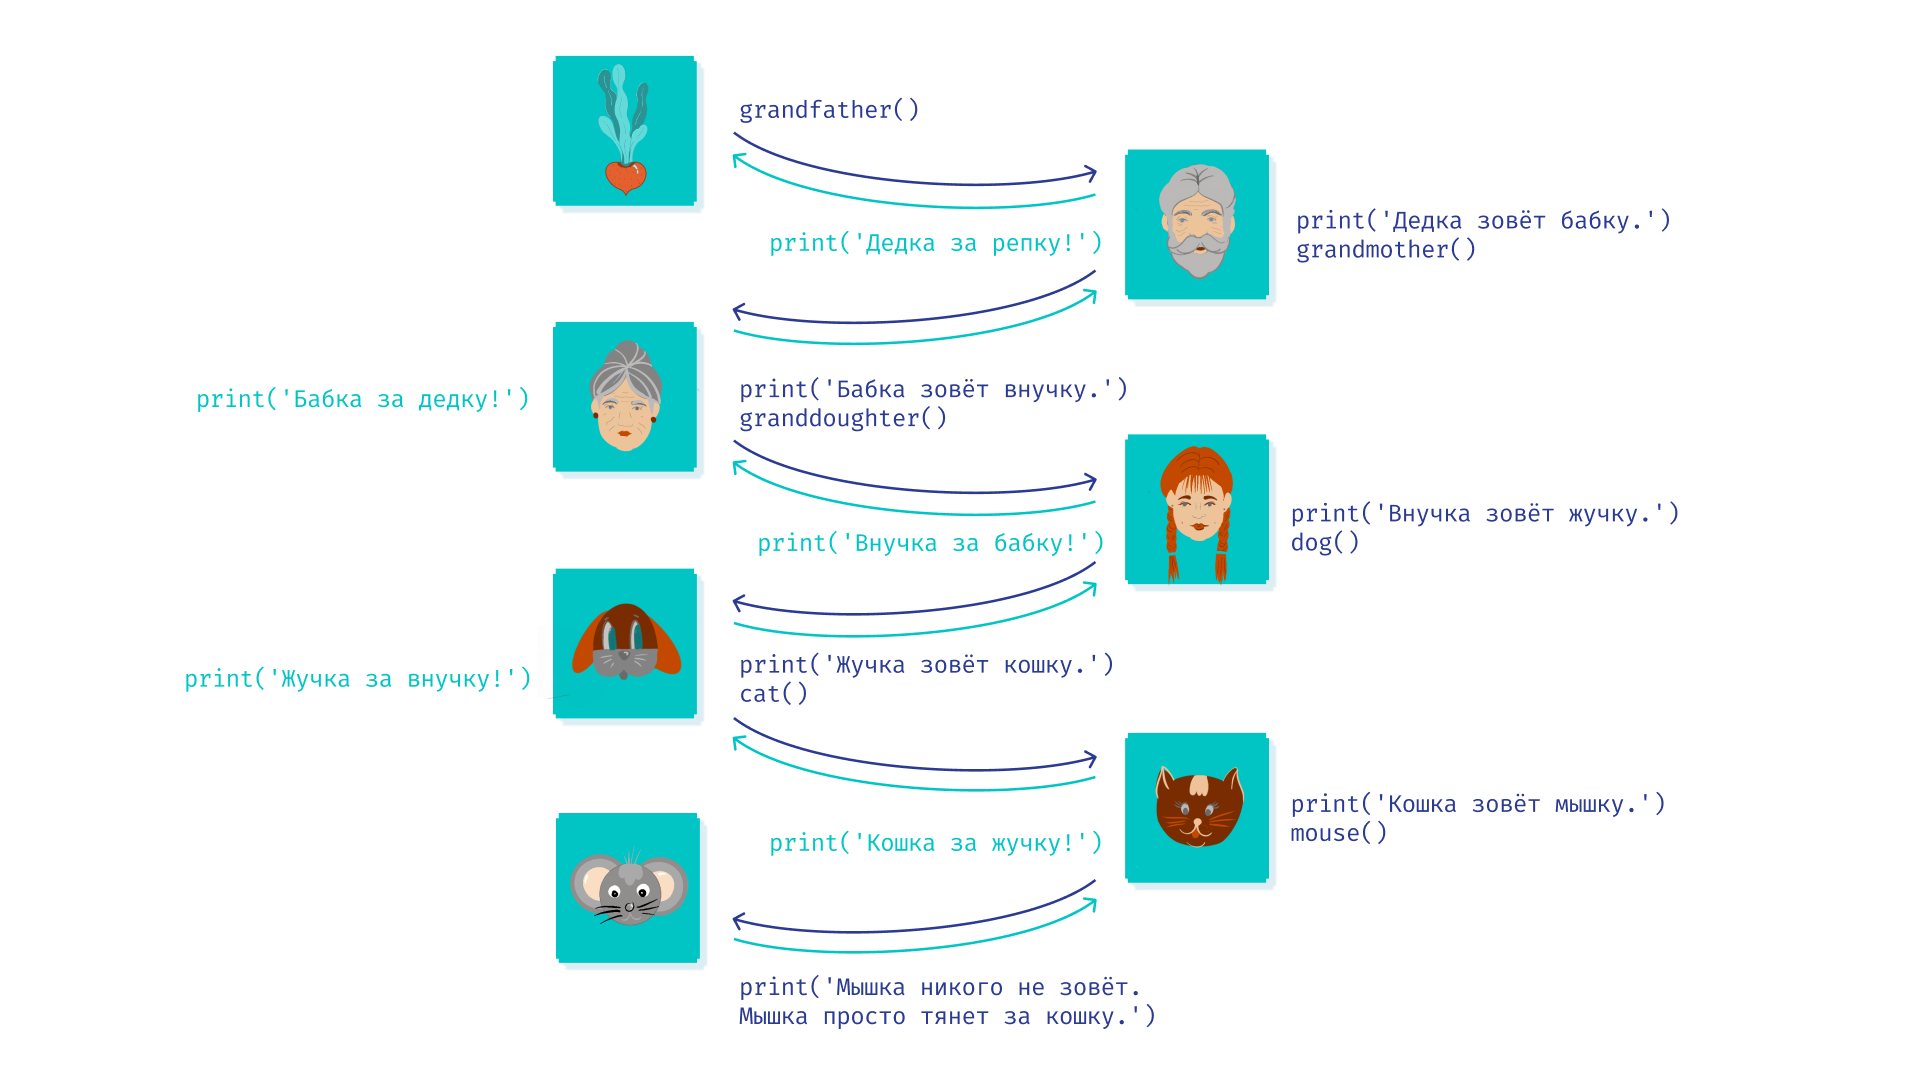

## Рекурсия

In [ ]:
# Оказывается, что внутри функции можно вызывать саму же эту функцию!

def fibonacci_i(i: int) -> int:
    if i == 0:
        return 0
    elif i == 1:
        return 1
    else:
        return fibonacci_i(i - 1) + fibonacci_i(i - 2)

In [ ]:
fibonacci_i(10), fibonacci_i(20), fibonacci_i(30)
# Попробуйте взять число побольше -- почему так медленно работает?

## Лямбды

In [ ]:
# Зачем: позволяет писать небольшие функции, не определяя их в общем пространстве имен

sorted(['привет', 'как', 'дела'], key=lambda string: len(string))

In [ ]:
string_length = lambda string: len(string)

<div class="alert alert-danger">
<b>Антипаттерн:</b> Сохранять лямбду в переменную. Весь смысл в том, что вы на лету создаете функцию, которой не засоряете пространство имен.
</div>

In [ ]:
# Как можно смотреть на это в общем случае
# lambda x: <какое-то выражение с x>
# Как будто бы
def lambda(x):
    return <какое-то выражение с x>

[Про выражения:](https://realpython.com/python-operators-expressions/)

A piece of syntax which can be evaluated to some value. In other words, an expression is an accumulation of expression elements like literals, names, attribute access, operators or function calls which all return a value. In contrast to many other languages, not all language constructs are expressions. There are also statements which cannot be used as expressions, such as while. Assignments are also statements, not expressions.

# [Файлы](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)

In [ ]:
# Теперь file -- файловый поток

file = open('my_log.log')
file

In [ ]:
content = file.read()

In [ ]:
len(content)

In [ ]:
file.close()

Из официальной документации:

<div class="alert alert-danger">
    <b>Warning:</b> Calling <code>f.write()</code> without using the <code>with</code> keyword or calling <code>f.close()</code> might result in the arguments of <code>f.write()</code> not being completely written to the disk, even if the program exits successfully.
</div>

Читать весь файл в память может быть очень дорого

In [ ]:
file = open('my_log.log')

In [ ]:
# Поэтому можем читать построчно

file.readline()

In [ ]:
file.close()

In [ ]:
# Кодировка важна!

file = open('unicode_file.txt', encoding='windows-1251')
file.read(5)

In [ ]:
file.close()

In [ ]:
file = open('unicode_file.txt', encoding='utf-8')
file.read(5)

In [ ]:
file.close()

А если нужно вернуться в начало прочитанного файла? Обязательно открывать заново?

In [ ]:
f = open('my_log.log')
content = f.read()

In [ ]:
# Так как ранее все прочитали -- теперь пустота
# Т.е. указатель внутри нашего файлового объекта дошел до самого конца

f.read()

In [ ]:
# Передвинем его в начало

f.seek(0)

In [ ]:
f.readline()

In [ ]:
f.tell()

Хочу читать с конца файла!

In [ ]:
f.seek(-100, 2)  # упс...

In [ ]:
f.close()

На самом деле, можно установить указатель и с конца, но только в режиме чтения байтов. Но мы не будем вскрывать эту тему...

### Modes

In [ ]:
f = open('my_log.log', 'r')
f.readline()  # в текстовом режиме читаются строки (strings)

In [ ]:
f.close()

### Write

In [ ]:
f = open('/tmp/junk.txt', 'w')

In [ ]:
# Записать переданную строку в файл

f.write('test\n')

In [ ]:
f.close()

In [ ]:
# Записать переданную строку в файл, не перетирая уже написанное
# Т.е. добавить в конец (режим 'a')

f = open('/tmp/junk.txt', 'a')
f.write('another one\n')
f.close()

In [ ]:
f = open('/tmp/junk.txt')
f.read()

In [ ]:
f.close()

### Read + write

In [ ]:
f = open('/tmp/junk.txt', 'r+')

In [ ]:
f.write('testtest\n')

In [ ]:
# Видим, что перезаписали содержимое

f.seek(0)
f.read()

In [ ]:
f.close()

### Context manager — не хотим каждый раз руками закрывать

In [ ]:
with open('/tmp/junk.txt') as f:
    print(f.read())

In [ ]:
# Еще один метод -- записать список строк

file = open('my.txt', 'w')
file.writelines(["Ехал грека\n", "Через реку,\n",
                 "Видит грека -\n", "В реке рак.\n"])
file.close()

In [ ]:
file = open('my.txt')
for line in file:
    x = line.lower().count('е')
    print(x, line.rstrip().center(30, '-'), sep='\t')

In [ ]:
file = open('my.txt')
for line in file:
    print(line.strip())
file.close()

In [ ]:
# Удостоверились, что файл закрылся сам -- не дает нам читать после блока с with

with open('my.txt') as file:
    for line in file:
        print(line.strip())
file.read()

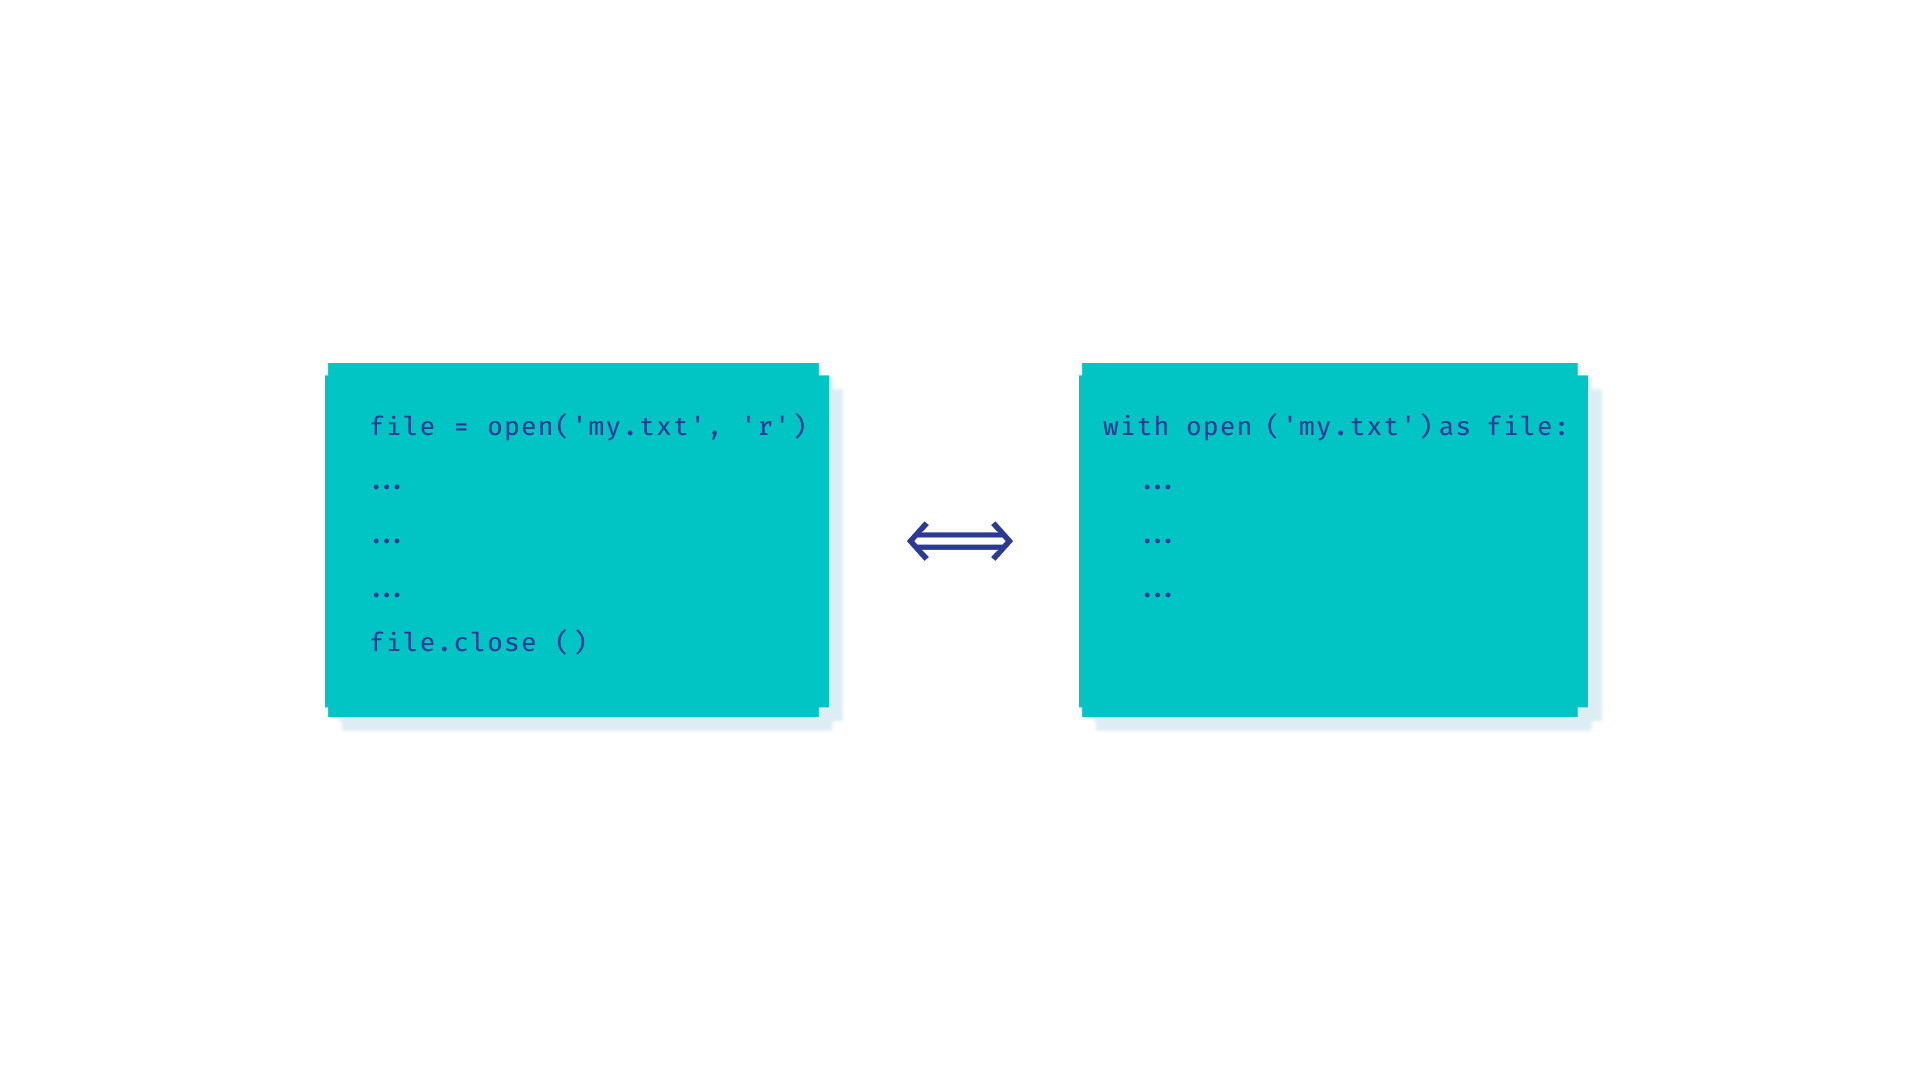